<a href="https://colab.research.google.com/github/SareetaM/Projects/blob/master/AutoencoderOnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000  train samples
10000  test samples
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 55us/step - loss: 0.3110 - val_loss: 0.2538
Epoch 2/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.2331 - val_loss: 0.2127
Epoch 3/40
60000/60000 [==============================] - 3s 51us/step - loss: 0.201

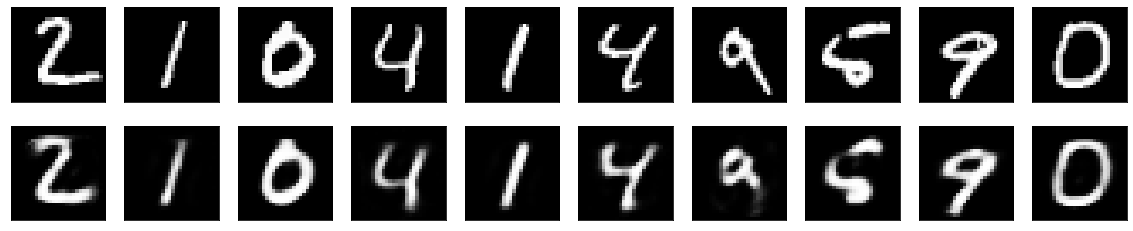

In [8]:
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import (Input, Dense)

# Load data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')
    
def AE(features_shape):

    # Input
        x = Input(name='inputs', shape=features_shape, dtype='float32')
        o = x
    
    # Encoder
        enc = Dense(32, activation='relu', name='encoder')(o)
    
    # Decoder
        dec = Dense(features_shape[0], activation='sigmoid', name='decoder')(enc)
    
    # Print network summary
        Model(inputs=x, outputs=dec).summary()
    
        return Model(inputs=x, outputs=dec)

batch_size = 128
epochs = 40

autoenc = AE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

autoenc.fit(x_train, x_train, epochs=epochs, batch_size=batch_size,
            shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoenc.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()